In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import numpy as np
from mapping import map_str_values

#### Đọc dữ liệu từ file csv

In [23]:
data = pd.read_csv('data/train_values.csv', index_col="building_id")
data.head()

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
building_id,,,,,,,,,,,,,,,,,,,,,
802906,6,487,12198,2,30,6,5,t,r,n,...,0,0,0,0,0,0,0,0,0,0
28830,8,900,2812,2,10,8,7,o,r,n,...,0,0,0,0,0,0,0,0,0,0
94947,21,363,8973,2,10,5,5,t,r,n,...,0,0,0,0,0,0,0,0,0,0
590882,22,418,10694,2,10,6,5,t,r,n,...,0,0,0,0,0,0,0,0,0,0
201944,11,131,1488,3,30,8,9,t,r,n,...,0,0,0,0,0,0,0,0,0,0


In [24]:
labels = pd.read_csv('data/train_labels.csv', index_col="building_id")
labels.head()

,damage_grade
building_id,
802906,3
28830,2
94947,3
590882,2
201944,3


In [25]:
test = pd.read_csv('data/test_values.csv')
test

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,300051,17,596,11307,3,20,7,6,t,r,...,0,0,0,0,0,0,0,0,0,0
1,99355,6,141,11987,2,25,13,5,t,r,...,1,0,0,0,0,0,0,0,0,0
2,890251,22,19,10044,2,5,4,5,t,r,...,0,0,0,0,0,0,0,0,0,0
3,745817,26,39,633,1,0,19,3,t,r,...,0,0,1,0,0,0,0,0,0,0
4,421793,17,289,7970,3,15,8,7,t,r,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86863,310028,4,605,3623,3,70,20,6,t,r,...,1,0,0,0,0,0,0,0,0,0
86864,663567,10,1407,11907,3,25,6,7,n,r,...,0,0,0,0,0,0,0,0,0,0
86865,1049160,22,1136,7712,1,50,3,3,t,r,...,0,0,0,0,0,0,0,0,0,0
86866,442785,6,1041,912,2,5,9,5,t,r,...,0,0,0,0,0,0,0,0,0,0


#### Gộp nhãn và các dữ liệu khác vào chung 1 bảng

In [26]:
df = pd.merge(data, labels, on='building_id')
df

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,...,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
building_id,,,,,,,,,,,,,,,,,,,,,
802906,6,487,12198,2,30,6,5,t,r,n,...,0,0,0,0,0,0,0,0,0,3
28830,8,900,2812,2,10,8,7,o,r,n,...,0,0,0,0,0,0,0,0,0,2
94947,21,363,8973,2,10,5,5,t,r,n,...,0,0,0,0,0,0,0,0,0,3
590882,22,418,10694,2,10,6,5,t,r,n,...,0,0,0,0,0,0,0,0,0,2
201944,11,131,1488,3,30,8,9,t,r,n,...,0,0,0,0,0,0,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
688636,25,1335,1621,1,55,6,3,n,r,n,...,0,0,0,0,0,0,0,0,0,2
669485,17,715,2060,2,0,6,5,t,r,n,...,0,0,0,0,0,0,0,0,0,3
602512,17,51,8163,3,55,6,7,t,r,q,...,0,0,0,0,0,0,0,0,0,3


In [27]:
df = map_str_values(df)
df

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,...,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
building_id,,,,,,,,,,,,,,,,,,,,,
802906,6,487,12198,2,30,6,5,2,2,0,...,0,0,0,0,0,0,0,0,0,3
28830,8,900,2812,2,10,8,7,1,2,0,...,0,0,0,0,0,0,0,0,0,2
94947,21,363,8973,2,10,5,5,2,2,0,...,0,0,0,0,0,0,0,0,0,3
590882,22,418,10694,2,10,6,5,2,2,0,...,0,0,0,0,0,0,0,0,0,2
201944,11,131,1488,3,30,8,9,2,2,0,...,0,0,0,0,0,0,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
688636,25,1335,1621,1,55,6,3,0,2,0,...,0,0,0,0,0,0,0,0,0,2
669485,17,715,2060,2,0,6,5,2,2,0,...,0,0,0,0,0,0,0,0,0,3
602512,17,51,8163,3,55,6,7,2,2,1,...,0,0,0,0,0,0,0,0,0,3


In [28]:
df.head()

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,...,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
building_id,,,,,,,,,,,,,,,,,,,,,
802906,6,487,12198,2,30,6,5,2,2,0,...,0,0,0,0,0,0,0,0,0,3
28830,8,900,2812,2,10,8,7,1,2,0,...,0,0,0,0,0,0,0,0,0,2
94947,21,363,8973,2,10,5,5,2,2,0,...,0,0,0,0,0,0,0,0,0,3
590882,22,418,10694,2,10,6,5,2,2,0,...,0,0,0,0,0,0,0,0,0,2
201944,11,131,1488,3,30,8,9,2,2,0,...,0,0,0,0,0,0,0,0,0,3


#### Chia dữ liệu thành train-test

In [29]:
X = df.drop('damage_grade', axis=1)
y = df['damage_grade']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Xây dựng mô hình

In [30]:


# Chuẩn hóa đặc trưng 
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Xây dựng mô hình hồi quy đa thức bằng thư viện
model = LogisticRegression(multi_class='multinomial', solver='lbfgs')

# Huấn luyện mô hình
model.fit(X_train, y_train)

# Mô hình đưa ra dự đoán
y_pred = model.predict(X_test)


In [31]:
all_params = model.get_params()
print("All Parameters:")
print(all_params)
# Mo hinh su dung binary classifier dang one-vs-rest a.k.a one-hot coding

All Parameters:
{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'multinomial', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


In [32]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

#### Confusion Matrix

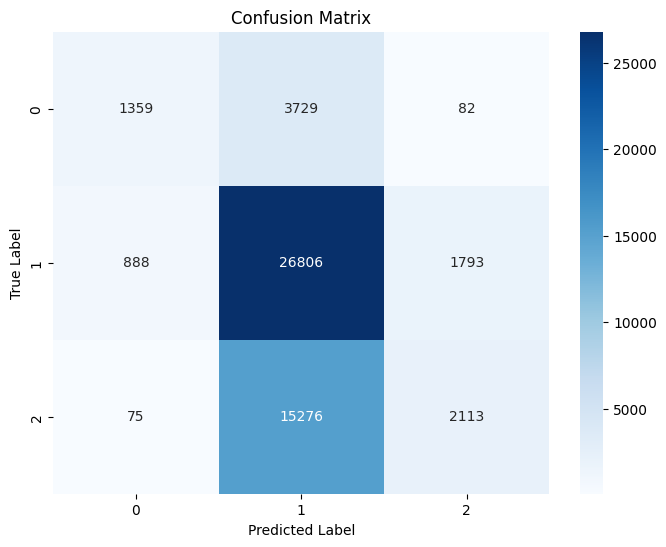

In [33]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

#### Đánh giá mô hình

In [34]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [35]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted') 
f1 = f1_score(y_test, y_pred, average='weighted')

print("Accuracy Score", accuracy)
print("Precision Score", precision)
print("Recall Score", recall)
print("F1 Score", f1)

Accuracy Score 0.5809174804781182
Precision Score 0.5666255585069859
Recall Score 0.5809174804781182
F1 Score 0.504799522393417


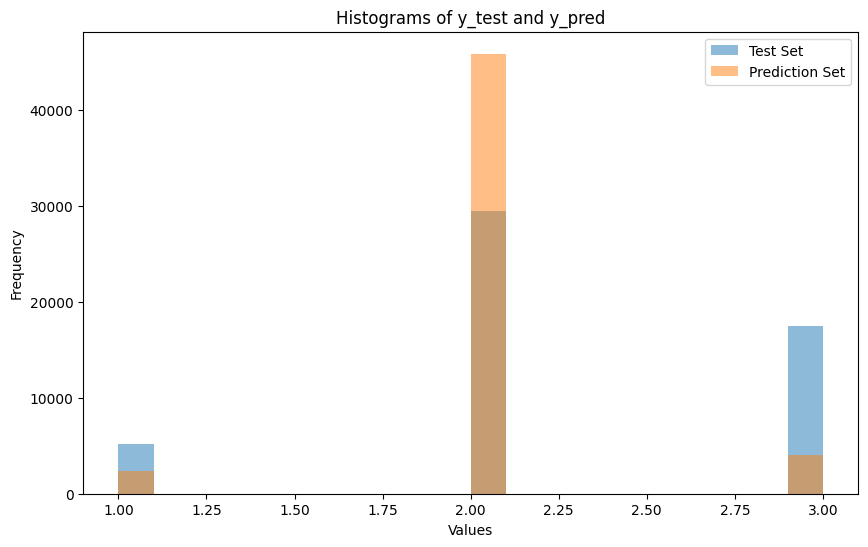

In [36]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(y_test, bins=20, alpha=0.5, label='Test Set')
plt.hist(y_pred, bins=20, alpha=0.5, label='Prediction Set')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histograms of y_test and y_pred')
plt.legend()
plt.show()


In [44]:
# Lấy ra các hệ số hồi quy
coefficients = model.coef_

# In ra các hệ số hồi quy của từng biến đầu vào cho mỗi lớp
for i, class_coef in enumerate(coefficients):
    print(f"Coefficients for class {i+1}:")
    for j, coef in enumerate(class_coef):
        print(f"  Feature {j+1}: {coef}")

Coefficients for class 1:
  Feature 1: 0.13561167761192017
  Feature 2: 0.039037618081506284
  Feature 3: 0.0118042053351772
  Feature 4: -0.26838308232334784
  Feature 5: 0.0014596082257848054
  Feature 6: 0.019579659900608812
  Feature 7: 0.04787523086769484
  Feature 8: 0.045271886775553265
  Feature 9: 0.028567040529552012
  Feature 10: 0.0009153872218638999
  Feature 11: 0.05936850621516996
  Feature 12: 0.015210151546297044
  Feature 13: -0.053247239290437606
  Feature 14: 0.006768050964658105
  Feature 15: -0.3252225777883627
  Feature 16: -0.548070926883538
  Feature 17: -0.2637826291998367
  Feature 18: -0.010034487628539196
  Feature 19: -0.25965318206368443
  Feature 20: 0.10292975683829053
  Feature 21: 0.09900532198893484
  Feature 22: 0.02022383125748879
  Feature 23: 0.1297219902988645
  Feature 24: 0.19753160080741206
  Feature 25: 0.049363395808665965
  Feature 26: -0.019337713377596707
  Feature 27: -0.10876708254225509
  Feature 28: -0.01322755452096598
  Feature 29:

##### Các hệ số này đại diện cho mức độ ảnh hưởng của mỗi biến đầu vào đối với dự đoán của mô hình Softmax. Các giá trị dương của hệ số biểu thị mối quan hệ tuyến tính dương với kết quả dự đoán, trong khi các giá trị âm biểu thị mối quan hệ tuyến tính âm.

In [43]:
print(model.intercept_)

[-1.38074733  1.03771648  0.34303085]


##### Có thể thấy trong mô hình softmax chúng ta có các hệ số chặn tương ứng với các lớp 1,2,3 của dữ liệu. Hệ số chặn càng cao, xác suất của lớp tương ứng sẽ cao hơn
##### Điều này giải thích tại sao trong confusion matrix các lớp được dự đoán là 2 tương đối lớn và cũng một phần do sự mất cân bằng dữ liệu